In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

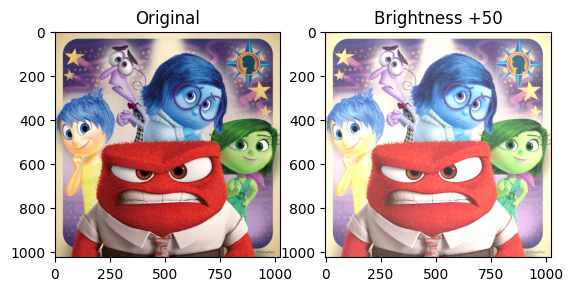

In [ ]:
img_color = cv2.imread('DataSet/animasi.jpg')

# Tambah kecerahan (diterapkan ke seluruh channel)
brightness_value = 50
bright_img = cv2.add(img_color, (brightness_value, brightness_value, brightness_value, 0))

# Tampilkan
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Brightness +50")
plt.imshow(cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB))

plt.show()

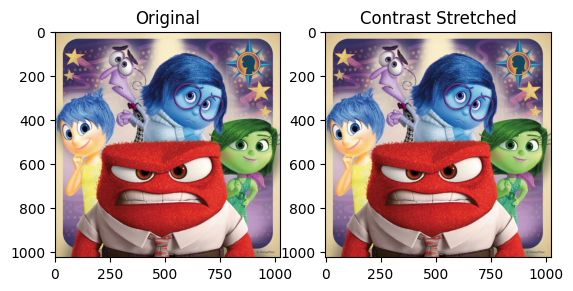

In [ ]:
# Baca gambar berwarna
img_color = cv2.imread('DataSet/animasi.jpg')

# Fungsi peregangan kontras untuk channel warna
def contrast_stretching_color(image):
    stretched = np.zeros_like(image)
    for i in range(3):  # Untuk setiap channel (B, G, R)
        min_val = np.min(image[:, :, i])
        max_val = np.max(image[:, :, i])
        stretched[:, :, i] = ((image[:, :, i] - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return stretched

# Terapkan peregangan kontras
contrast_img = contrast_stretching_color(img_color)

# Tampilkan hasil
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Contrast Stretched")
plt.imshow(cv2.cvtColor(contrast_img, cv2.COLOR_BGR2RGB))

plt.show()

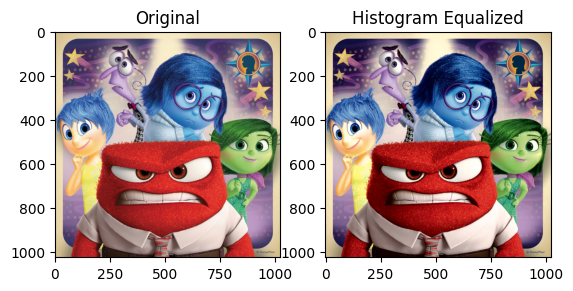

In [33]:
# Baca gambar berwarna
img_color = cv2.imread('DataSet/animasi.jpg')

# Ubah ke YCrCb
img_ycrcb = cv2.cvtColor(img_color, cv2.COLOR_BGR2YCrCb)

# Equalisasi hanya pada channel Y (luminance)
img_ycrcb[:, :, 0] = cv2.equalizeHist(img_ycrcb[:, :, 0])

# Kembali ke BGR
equalized_img = cv2.cvtColor(img_ycrcb, cv2.COLOR_YCrCb2BGR)

# Tampilkan
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Histogram Equalized")
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))

plt.show()

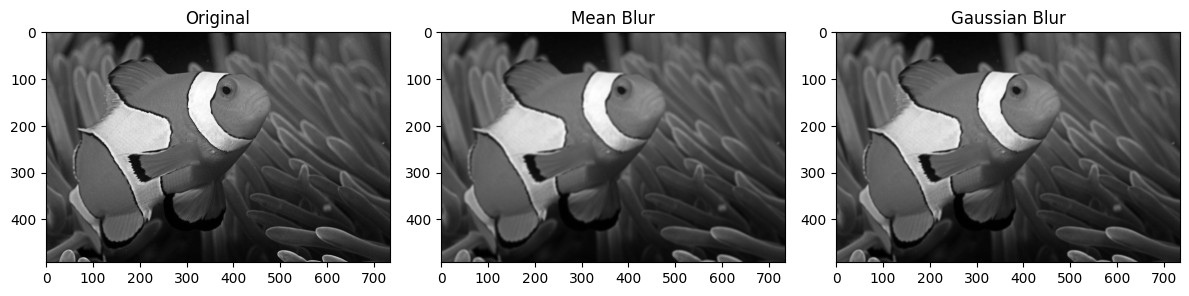

In [ ]:
# Load citra grayscale
img = cv2.imread('DataSet/nemo1.jpg', cv2.IMREAD_GRAYSCALE)

# Pelembutan Citra
blur_mean = cv2.blur(img, (5, 5))
blur_gaussian = cv2.GaussianBlur(img, (5, 5), 0)

# Tampilkan hasil
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Mean Blur")
plt.imshow(blur_mean, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Gaussian Blur")
plt.imshow(blur_gaussian, cmap='gray')

plt.tight_layout()
plt.show()


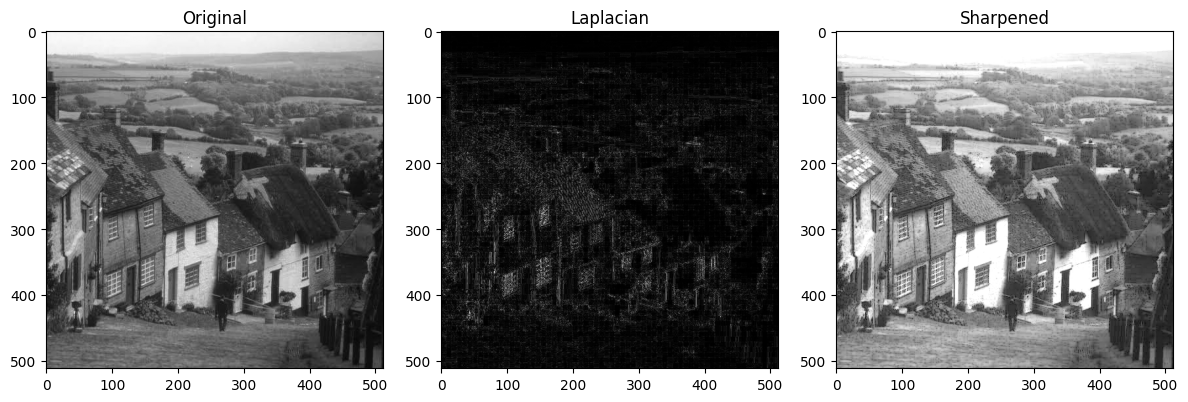

In [35]:
# Load citra grayscale
img = cv2.imread('DataSet/goldhill.jpg', cv2.IMREAD_GRAYSCALE)

# Kernel Laplacian
kernel_laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Proses Laplacian dan sharpening
laplacian = cv2.filter2D(img, cv2.CV_64F, kernel_laplacian)
laplacian = np.uint8(np.absolute(laplacian))  # konversi ke 8-bit
sharpened = cv2.addWeighted(img, 1.5, laplacian, -0.5, 0)

# Tampilkan hasil
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Laplacian")
plt.imshow(laplacian, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Sharpened")
plt.imshow(sharpened, cmap='gray')

plt.tight_layout()
plt.show()


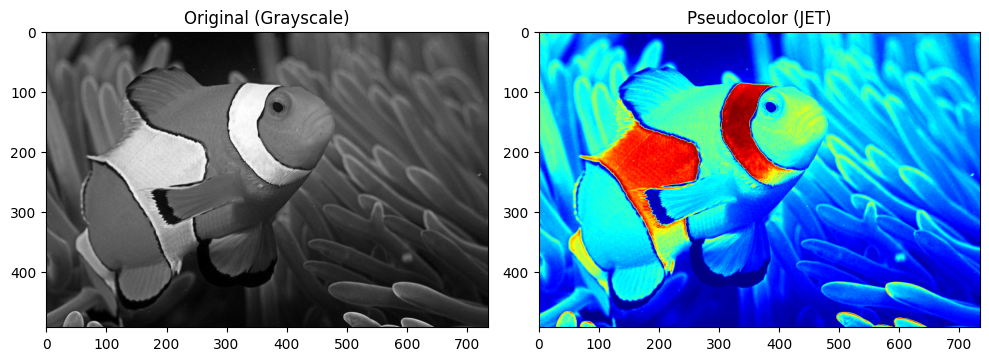

In [36]:
# Load citra grayscale
img = cv2.imread('DataSet/nemo1.jpg', cv2.IMREAD_GRAYSCALE)

# Pewarnaan Semu dengan COLORMAP_JET
colored_image = cv2.applyColorMap(img, cv2.COLORMAP_JET)

# Tampilkan hasil
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original (Grayscale)")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Pseudocolor (JET)")
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

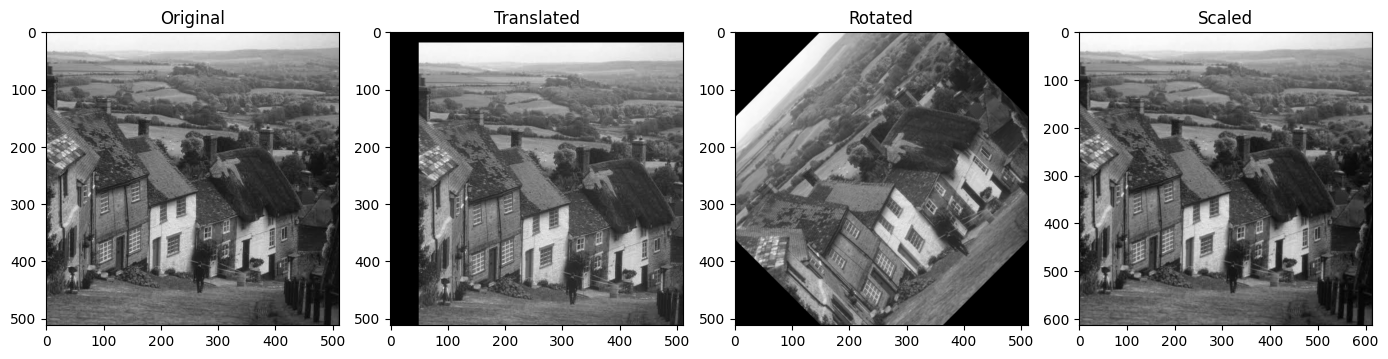

In [37]:
# Load citra grayscale
img = cv2.imread('DataSet/goldhill.jpg', cv2.IMREAD_GRAYSCALE)

# Ukuran gambar
height, width = img.shape[:2]

# Translasi
translation_matrix = np.float32([[1, 0, 50], [0, 1, 20]])
translated_image = cv2.warpAffine(img, translation_matrix, (width, height))

# Rotasi
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 45, 1)
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))

# Skala (Scaling)
scaled_image = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)

# Tampilkan hasil
plt.figure(figsize=(14, 6))

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Translated")
plt.imshow(translated_image, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Rotated")
plt.imshow(rotated_image, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Scaled")
plt.imshow(scaled_image, cmap='gray')

plt.tight_layout()
plt.show()